In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import torchvision.transforms as transforms

In [5]:
import os

In [20]:
os.chdir("/Users/opheliaming/Downloads/")

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [26]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [30]:
style1_img = image_loader("./wikiart/Impressionism/abdullah-suriosubroto_air-terjun.jpg")
style2_img = image_loader("./wikiart/Cubism/adolf-fleischmann_hommage-delaunay-et-gleizes-1938.jpg")

In [31]:
style1_img.size()

torch.Size([1, 3, 194, 128])

In [32]:
style2_img.size()

torch.Size([1, 3, 211, 128])

In [ ]:
#assert style_img.size() == content_img.size(), \
#    "we need to import style and content images of the same size

In [14]:
#os.getcwd()

In [15]:
#from pathlib import Path

In [16]:
#path_to_download_folder = str(os.path.join(Path.home(), "Downloads"))

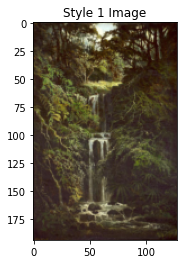

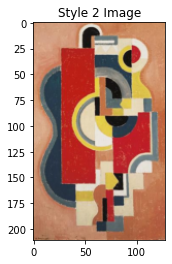

In [33]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(style1_img, title='Style 1 Image')

plt.figure()
imshow(style2_img, title='Style 2 Image')